In [1]:
#%reset -f                       # Reset memory

import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
np.set_printoptions(precision = 3,          # Display upto 3 decimal places
                    threshold=np.inf        # Display full array
                    )

In [3]:
# Display output of command in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
#pd.options.display.float_format = '${:,.2f}'.format
pd.options.display.float_format = '{:.2f}'.format

In [5]:
# Go to folder containing data file
#os.chdir("E:\\IDA_Training\\nyse_Exercise\\854_1575_bundle_archive")
#os.listdir()            # List all files in the folder

# 2.1 Read file and while reading file,
#      convert 'Timestamp' to datetime time
#df = pd.read_csv("fundamentals.csv",
 #                 parse_dates = ['Period Ending']    # especial for date parsing
#                  )

df = pd.read_csv("../input/nyse/fundamentals.csv",
                  parse_dates = ['Period Ending']    # especial for date parsing
                  )
df.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3068000000.00,-222000000.00,-1961000000.00,23.00,-1888000000.00,4695000000.00,53.00,1330000000.00,0.00,127000000.00,10499000000.00,78.00,0.00,223000000.00,1001000000.00,-1813000000.00,-2445000000.00,0.00,0.00,13402000000.00,0.00,58.00,14356000000.00,-569000000.00,869000000.00,632000000.00,580000000.00,306000000.00,473000000.00,7116000000.00,0.00,0.00,0.00,-1020000000.00,197000000.00,1285000000.00,483000000.00,-1571000000.00,-1876000000.00,2050000000.00,-1876000000.00,-4084000000.00,1124000000.00,386000000.00,148000000.00,1.00,2167000000.00,626000000.00,4524000000.00,-2980000000.00,1509000000.00,11000000.00,15147000000.00,-141000000.00,845000000.00,10.00,31.00,8.00,72.00,0.00,-9462000000.00,0.00,12977000000.00,1419000000.00,3412000000.00,23510000000.00,7072000000.00,9011000000.00,-7987000000.00,24891000000.00,16904000000.00,24855000000.00,-367000000.00,2012.00,-5.60,335000000.00
1,1,AAL,2013-12-31,4975000000.00,-93000000.00,-2723000000.00,67.00,-3114000000.00,10592000000.00,75.00,2175000000.00,0.00,5000000.00,11019000000.00,104.00,0.00,935000000.00,1020000000.00,-1324000000.00,-2180000000.00,0.00,0.00,19259000000.00,4086000000.00,59.00,15724000000.00,-346000000.00,2311000000.00,856000000.00,1012000000.00,-1181000000.00,-235000000.00,15353000000.00,0.00,0.00,0.00,2208000000.00,660000000.00,675000000.00,3799000000.00,-3814000000.00,-1834000000.00,1873000000.00,-1834000000.00,-4489000000.00,1560000000.00,559000000.00,1399000000.00,5.00,2299000000.00,1465000000.00,7385000000.00,-2032000000.00,1711000000.00,481000000.00,14915000000.00,-56000000.00,853000000.00,8.00,80.00,7.00,96.00,0.00,-11296000000.00,0.00,12913000000.00,1446000000.00,8111000000.00,42278000000.00,14323000000.00,13806000000.00,-2731000000.00,45009000000.00,42278000000.00,26743000000.00,0.00,2013.00,-11.25,163022222.22
2,2,AAL,2014-12-31,4668000000.00,-160000000.00,-150000000.00,143.00,-5311000000.00,15135000000.00,60.00,1768000000.00,0.00,7000000.00,15620000000.00,88.00,0.00,829000000.00,1342000000.00,4099000000.00,3212000000.00,0.00,0.00,23084000000.00,4091000000.00,63.00,27030000000.00,330000000.00,2240000000.00,887000000.00,1004000000.00,1799000000.00,-1026000000.00,16043000000.00,0.00,0.00,0.00,170000000.00,-146000000.00,3080000000.00,-315000000.00,-2911000000.00,2882000000.00,542000000.00,2882000000.00,2882000000.00,1771000000.00,800000000.00,4249000000.00,10.00,2060000000.00,898000000.00,7059000000.00,-4559000000.00,817000000

In [6]:
df.shape               
df.dtypes

(1781, 79)

Unnamed: 0                                                      int64
Ticker Symbol                                                  object
Period Ending                                          datetime64[ns]
Accounts Payable                                              float64
Accounts Receivable                                           float64
Add'l income/expense items                                    float64
After Tax ROE                                                 float64
Capital Expenditures                                          float64
Capital Surplus                                               float64
Cash Ratio                                                    float64
Cash and Cash Equivalents                                     float64
Changes in Inventories                                        float64
Common Stocks                                                 float64
Cost of Revenue                                               float64
Current Ratio       

In [7]:
df.columns = df.columns.str.replace(".", "")
df.columns = df.columns.str.replace(" / ", "_")
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace(",", "")
df.columns = df.columns.str.replace("-", "")
df.columns = df.columns.str.replace("'", "")
df.columns = df.columns.str.replace("&", "")

In [8]:
df.shape
df.dropna(axis=1,inplace=True)
df.shape

(1781, 79)

(1781, 73)

In [9]:
df.head()

,Unnamed:_0,Ticker_Symbol,Period_Ending,Accounts_Payable,Accounts_Receivable,Addl_income/expense_items,After_Tax_ROE,Capital_Expenditures,Capital_Surplus,Cash_and_Cash_Equivalents,Changes_in_Inventories,Common_Stocks,Cost_of_Revenue,Deferred_Asset_Charges,Deferred_Liability_Charges,Depreciation,Earnings_Before_Interest_and_Tax,Earnings_Before_Tax,Effect_of_Exchange_Rate,Equity_Earnings/Loss_Unconsolidated_Subsidiary,Fixed_Assets,Goodwill,Gross_Margin,Gross_Profit,Income_Tax,Intangible_Assets,Interest_Expense,Inventory,Investments,Liabilities,LongTerm_Debt,LongTerm_Investments,Minority_Interest,Misc_Stocks,Net_Borrowings,Net_Cash_Flow,Net_Cash_FlowOperating,Net_Cash_FlowsFinancing,Net_Cash_FlowsInvesting,Net_Income,Net_Income_Adjustments,Net_Income_Applicable_to_Common_Shareholders,Net_IncomeCont_Operations,Net_Receivables,NonRecurring_Items,Operating_Income,Operating_Margin,Other_Assets,Other_Current_Assets,Other_Current_Liabilities,Other_Equity,Other_Financing_Activities,Other_Investing_Activities,Other_Liabilities,Other_Operating_Activities,Other_Operating_Items,PreTax_Margin,PreTax_ROE,Profit_Margin,Research_and_Development,Retained_Earnings,Sale_and_Purchase_of_Stock,Sales_General_and_Admin,ShortTerm_Debt_Current_Portion_of_LongTerm_Debt,ShortTerm_Investments,Total_Assets,Total_Current_Assets,Total_Current_Liabilities,Total_Equity,Total_Liabilities,Total_Liabilities__Equity,Total_Revenue,Treasury_Stock
0,0,AAL,2012-12-31,3068000000.00,-222000000.00,-1961000000.00,23.00,-1888000000.00,4695000000.00,1330000000.00,0.00,127000000.00,10499000000.00,0.00,223000000.00,1001000000.00,-1813000000.00,-2445000000.00,0.00,0.00,13402000000.00,0.00,58.00,14356000000.00,-569000000.00,869000000.00,632000000.00,580000000.00,306000000.00,473000000.00,7116000000.00,0.00,0.00,0.00,-1020000000.00,197000000.00,1285000000.00,483000000.00,-1571000000.00,-1876000000.00,2050000000.00,-1876000000.00,-4084000000.00,1124000000.00,386000000.00,148000000.00,1.00,2167000000.00,626000000.00,4524000000.00,-2980000000.00,1509000000.00,11000000.00,15147000000.00,-141000000.00,845000000.00,10.00,31.00,8.00,0.00,-9462000000.00,0.00,12977000000.00,1419000000.00,3412000000.00,23510000000.00,7072000000.00,9011000000.00,-7987000000.00,24891000000.00,16904000000.00,24855000000.00,-367000000.00
1,1,AAL,2013-12-31,4975000000.00,-93000000.00,-2723000000.00,67.00,-3114000000.00,10592000000.00,2175000000.00,0.00,5000000.00,11019000000.00,0.00,935000000.00,1020000000.00,-1324000000.00,-2180000000.00,0.00,0.00,19259000000.00,4086000000.00,59.00,15724000000.00,-346000000.00,2311000000.00,856000000.00,1012000000.00,-1181000000.00,-235000000.00,15353000000.00,0.00,0.00,0.00,2208000000.00,660000000.00,675000000.00,3799000000.00,-3814000000.00,-1834000000.00,1873000000.00,-1834000000.00,-4489000000.00,1560000000.00,559000000.00,1399000000.00,5.00,2299000000.00,1465000000.00,7385000000.00,-2032000000.00,1711000000.00,481000000.00,14915000000.00,-56000000.00,853000000.00,8.00,80.00,7.00,0.00,-11296000000.00,0.00,12913000000.00,1446000000.00,8111000000.00,42278000000.00,14323000000.00,13806000000.00,-2731000000.00,45009000000.00,42278000000.00,26743000000.00,0.00
2,2,AAL,2014-12-31,4668000000.00,-160000000.00,-150000000.00,143.00,-5311000000.00,15135000000.00,1768000000.00,0.00,7000000.00,15620000000.00,0.00,829000000.00,1342000000.00,4099000000.00,3212000000.00,0.00,0.00,23084000000.00,4091000000.00,63.00,27030000000.00,330000000.00,2240000000.00,887000000.00,1004000000.00,1799000000.00,-1026000000.00,16043000000.00,0.00,0.00,0.00,170000000.00,-146000000.00,3080000000.00,-315000000.00,-2911000000.00,2882000000.00,542000000.00,2882000000.00,2882000000.00,1771000000.00,800000000.00,4249000000.00,10.00,2060000000.00,898000000.00,7059000000.00,-4559000000.00,817000000.00,601000000.00,10928000000.00,-500000000.00,1295000000.00,8.00,159.00,7.00,0.00,-8562000000.00,-1052000000.00,20686000000.00,1677000000.00,6309000000.00,43225000000.00,11750000000.00,13404000000.00,2021000000.00,412040

In [10]:
df=df.groupby(['Ticker_Symbol']).mean()
df =df.reset_index()
df.head()

,Ticker_Symbol,Unnamed:_0,Accounts_Payable,Accounts_Receivable,Addl_income/expense_items,After_Tax_ROE,Capital_Expenditures,Capital_Surplus,Cash_and_Cash_Equivalents,Changes_in_Inventories,Common_Stocks,Cost_of_Revenue,Deferred_Asset_Charges,Deferred_Liability_Charges,Depreciation,Earnings_Before_Interest_and_Tax,Earnings_Before_Tax,Effect_of_Exchange_Rate,Equity_Earnings/Loss_Unconsolidated_Subsidiary,Fixed_Assets,Goodwill,Gross_Margin,Gross_Profit,Income_Tax,Intangible_Assets,Interest_Expense,Inventory,Investments,Liabilities,LongTerm_Debt,LongTerm_Investments,Minority_Interest,Misc_Stocks,Net_Borrowings,Net_Cash_Flow,Net_Cash_FlowOperating,Net_Cash_FlowsFinancing,Net_Cash_FlowsInvesting,Net_Income,Net_Income_Adjustments,Net_Income_Applicable_to_Common_Shareholders,Net_IncomeCont_Operations,Net_Receivables,NonRecurring_Items,Operating_Income,Operating_Margin,Other_Assets,Other_Current_Assets,Other_Current_Liabilities,Other_Equity,Other_Financing_Activities,Other_Investing_Activities,Other_Liabilities,Other_Operating_Activities,Other_Operating_Items,PreTax_Margin,PreTax_ROE,Profit_Margin,Research_and_Development,Retained_Earnings,Sale_and_Purchase_of_Stock,Sales_General_and_Admin,ShortTerm_Debt_Current_Portion_of_LongTerm_Debt,ShortTerm_Investments,Total_Assets,Total_Current_Assets,Total_Current_Liabilities,Total_Equity,Total_Liabilities,Total_Liabilities__Equity,Total_Revenue,Treasury_Stock
0,AAL,1.50,4453250000.00,-30750000.00,-1385500000.00,92.00,-4116000000.00,10503250000.00,1589500000.00,0.00,36250000.00,12058500000.00,619250000.00,663500000.00,1212500000.00,1614500000.00,800750000.00,0.00,0.00,20813750000.00,3067000000.00,63.25,21751000000.00,-894750000.00,1917250000.00,813750000.00,864750000.00,341750000.00,-355250000.00,14210500000.00,0.00,0.00,0.00,1053500000.00,26750000.00,2822250000.00,677000000.00,-3472500000.00,1695500000.00,450750000.00,1695500000.00,479750000.00,1470000000.00,699000000.00,3000000000.00,7.75,2157250000.00,934250000.00,6310000000.00,-3575750000.00,1033250000.00,301750000.00,12792000000.00,-150500000.00,1089250000.00,9.25,88.00,10.25,0.00,-7637500000.00,-1224500000.00,16962750000.00,1693250000.00,5924000000.00,39357000000.00,10782500000.00,12456500000.00,-765500000.00,38471000000.00,37705500000.00,33809500000.00,-91750000.00
1,AAP,5.50,3097953750.00,-47898750.00,-273500.00,25.50,-232533000.00,554446250.00,476508750.00,-233891000.00,7000.00,4263282250.00,0.00,220069000.00,237877000.00,748507250.00,696188500.00,-2169500.00,0.00,1361297000.00,565283500.00,47.50,3806641750.00,259525750.00,378491750.00,52318750.00,3244222250.00,0.00,241982000.00,1126650250.00,0.00,0.00,0.00,199105250.00,8220250.00,657291000.00,147270750.00,-794172000.00,436662750.00,31767750.00,436662750.00,436662750.00,421268500.00,0.00,748780750.00,9.50,49963000.00,71843000.00,95444500.00,-12511500.00,-23059750.00,-561639000.00,230464750.00,-9208750.00,0.00,9.00,40.75,5.50,0.00,1347607500.00,-23962750.00,3057861000.00,680750.00,0.00,6568877750.00,4213842500.00,3194079000.00,1797614750.00,4771263000.00,6568877750.00,8069924000.00,-91934500.00
2,AAPL,9.50,51216000000.00,-2620250000.00,1192250000.00,36.50,-10429250000.00,0.00,17426750000.00,-267500000.00,25436000000.00,122582250000.00,0.00,3052500000.00,9116250000.00,59381250000.00,59381250000.00,0.00,0.00,21675500000.00,4180750000.00,39.00,78182500000.00,15474250000.00,3855000000.00,0.00,2089000000.00,-27377000000.00,8762250000.00,43675750000.00,142718000000.00,0.00,0.00,21631000000.00,2434500000.00,65117250000.00,-23031750000.00,-39651000000.00,43907000000.00,5680000000.00,43907000000.00,43907000000.00,28818250000.00,0.00,58189000000.00,29.00,5772250000.00,10014000000.00,8236500000.00,225000000.00,-1327250000.00,-1844750000.00,28633750000.00,539500000.00,0.00,29.25,49.50,22.00,7157000000.00,95014000000.00,-32634250000.00,12836500000.00,7228000000.00,26168000000.00,262717500000.00,84516000000.00,66680500000.00,120675000000.00,142042500000.00,262717500000.00,200764750000.00,0.00
3,ABBV,

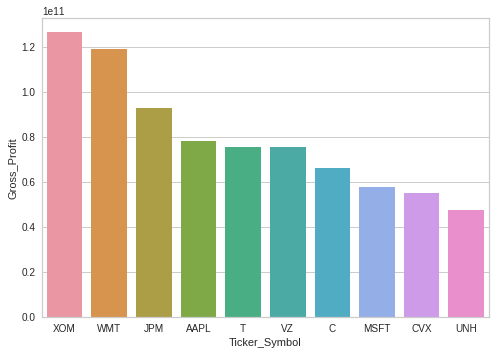

In [11]:
#plt.figure(figsize=(10, 8))
top10 = df.nlargest(10, "Gross_Profit")
sns.barplot(x="Ticker_Symbol", y="Gross_Profit", data=top10)

In [12]:
#if Net profit > 300 crores will yeild divident
df['Net_profit']=df['Gross_Profit']-df['Income_Tax']
df['Divident_yeild'] = [1 if x >3000000000 else 0 for x in df['Net_profit']]
gr=df.groupby(['Divident_yeild'])
gr['Divident_yeild'].agg(['count'])

,count
Divident_yeild,
0,235
1,213


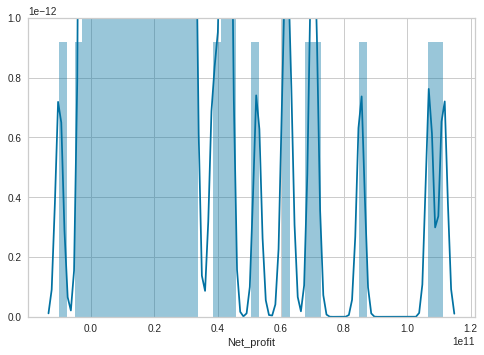

In [13]:
sns.distplot(df.Net_profit) 

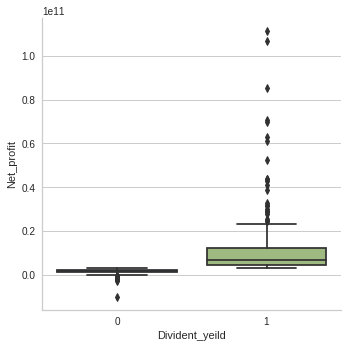

In [14]:
sns.catplot('Divident_yeild','Net_profit', data = df, kind = 'box') 

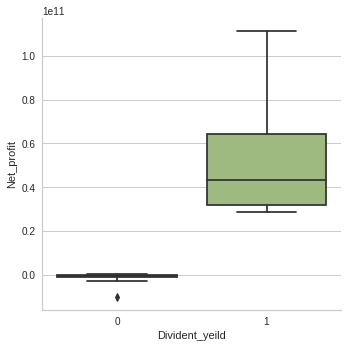

In [15]:
#df.head()
#top20 = df.nlargest(20, "Net_profit")
top20 = df.nlargest(20, 'Net_profit')
bottom20 = df.nsmallest(20, 'Net_profit')
frames = [top20, bottom20]
result = pd.concat(frames)
sns.catplot('Divident_yeild','Net_profit', data = result, kind = 'box')

In [16]:
y = df['Divident_yeild'].values
df.drop(columns = ['Divident_yeild'], inplace = True)

In [17]:
num_columns = df.select_dtypes(include = ['float64', 'int64']).copy()

ss = StandardScaler()     # Create an instance of class
ss.fit(num_columns)                # Train object on the data
X = ss.transform(num_columns)      # Transform data
X[:2, :]                  # See first 2 rows


StandardScaler()

array([[-1.728e+00, -1.468e-02,  7.488e-02, -3.099e+00,  3.585e-01,
        -9.791e-01,  4.610e-01, -1.283e-01,  2.150e-01, -1.726e-01,
        -8.650e-03,  1.205e-02, -2.127e-01,  6.076e-02, -1.879e-01,
        -2.940e-01,  3.102e-01, -1.304e-01,  6.449e-01, -1.131e-01,
         6.575e-01,  1.086e+00, -9.562e-01, -8.469e-03,  4.745e-01,
        -1.625e-01,  1.739e-01, -4.537e-01,  2.114e-01, -1.670e-01,
        -1.458e-01, -2.752e-01,  1.370e-01, -3.529e-02, -6.396e-02,
         2.003e-01, -9.030e-02, -8.620e-04,  1.086e-01,  3.912e-03,
        -3.107e-01, -2.358e-01,  4.915e-01,  1.574e-01, -7.129e-01,
        -1.073e-01,  2.407e-01, -7.971e-02, -1.049e+00,  1.200e-01,
         2.593e-01,  7.055e-02, -1.009e-01,  8.030e-02, -5.628e-01,
         1.486e-01, -2.898e-01, -2.894e-01, -6.646e-01, -2.070e-01,
         1.446e+00, -6.546e-02,  8.666e-01, -8.014e-02,  3.068e-01,
         8.381e-01, -4.931e-01, -2.886e-02, -8.822e-02,  3.357e-01,
         2.761e-01,  1.327e+00],
       [-1.720e

In [18]:
X_train, X_test, _, y_test = train_test_split( X,               
                                               y,               
                                               test_size = 0.25 
                                               )

X_train.shape              
X_test.shape               

(336, 72)

(112, 72)

In [19]:
clf = KMeans(n_clusters = 2)
clf.fit(X_train)
clf.cluster_centers_
clf.cluster_centers_.shape         
clf.labels_                        
clf.labels_.size                   
clf.inertia_                       
silhouette_score(X_train, clf.labels_)    

KMeans(n_clusters=2)

array([[ 4.505e-03, -1.028e-01,  5.759e-04, -2.108e-02, -9.414e-03,
         1.016e-01, -6.616e-02, -8.126e-02,  5.211e-02, -2.926e-02,
        -7.733e-02,  1.181e-02, -8.631e-02, -1.170e-01, -1.219e-01,
        -1.123e-01,  5.506e-02, -6.286e-02, -1.028e-01, -7.782e-02,
         1.207e-03, -1.122e-01, -1.160e-01, -6.169e-02, -1.027e-01,
        -4.526e-02,  6.193e-02, -1.779e-02, -9.575e-02, -7.735e-02,
        -8.211e-02, -3.691e-02,  1.633e-02, -1.063e-02, -1.311e-01,
         1.607e-02,  9.103e-02, -1.052e-01,  1.534e-02, -1.040e-01,
        -1.064e-01, -4.611e-02, -4.048e-02, -1.066e-01, -7.524e-04,
        -3.805e-02, -4.665e-02, -7.983e-02,  4.919e-02, -6.316e-02,
        -2.787e-02,  2.490e-03, -6.126e-02, -6.722e-02,  7.298e-03,
        -6.947e-03,  1.349e-02, -2.446e-02, -9.764e-02,  6.943e-02,
        -1.157e-01, -8.524e-02,  1.317e-03, -9.135e-02, -4.002e-02,
        -6.932e-02, -1.087e-01, -8.684e-02, -9.135e-02, -1.023e-01,
         4.874e-02, -1.083e-01],
       [-2.826e

(2, 72)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

336

18375.744227125844

0.8330756674097375

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

0.5

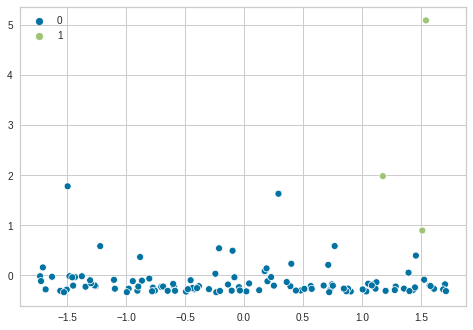

In [20]:
y_pred = clf.predict(X_test)
y_pred

np.sum(y_pred == y_test)/y_test.size

dx = pd.Series(X_test[:, 0])
dy = pd.Series(X_test[:,1])
sns.scatterplot(dx,dy, hue = y_pred)

In [21]:
#  Scree plot:
sse = []
for i,j in enumerate(range(10)):
      n_clusters = i+1
 
    clf1 = KMeans(n_clusters = n_clusters)
    
    clf1.fit(X_train)
  
    sse.append(clf1.inertia_ )

# Plot the line now
sns.lineplot(range(1, 11), sse)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 6)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f40658affd0>,
                     colors='yellowbrick', model=None)

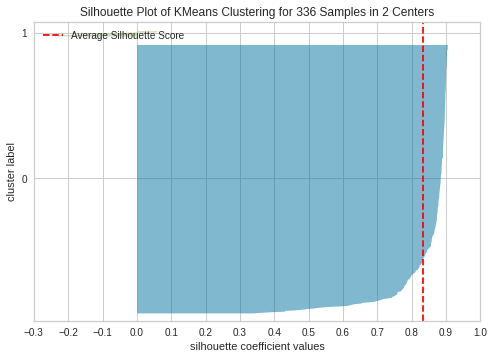

In [23]:
visualizer = SilhouetteVisualizer(clf, colors='yellowbrick')
visualizer.fit(X_train)        
visualizer.show()              

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f4065911b50>,
                     model=None)

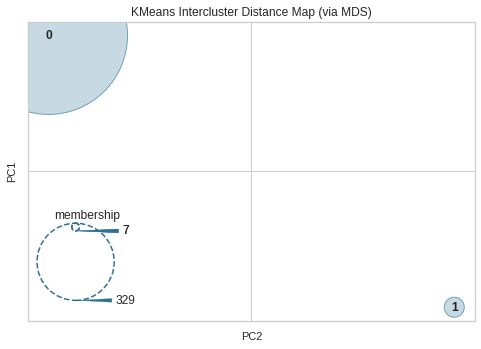

In [24]:
# Intercluster distance: Does not work
from yellowbrick.cluster import InterclusterDistance
visualizer = InterclusterDistance(clf)
visualizer.fit(X_train)        
visualizer.show()              